# Team 14

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define constants


In [17]:
IMAGE_SIZE = (28, 28)
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 10
TRAINING_SET_PATH = '/data/data/trainingSet'


# Load images using ImageDataGenerator


In [18]:

train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    TRAINING_SET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAINING_SET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 33604 images belonging to 10 classes.
Found 8396 images belonging to 10 classes.


# Define the CNN model


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


# Compile the model


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)


Epoch 1/10
1050/1050 [==============================] - 37s 35ms/step - loss: 0.2729 - accuracy: 0.9145 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 2/10
1050/1050 [==============================] - 36s 34ms/step - loss: 0.0947 - accuracy: 0.9718 - val_loss: 0.0408 - val_accuracy: 0.9876
Epoch 3/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 4/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0373 - val_accuracy: 0.9899
Epoch 5/10
1050/1050 [==============================] - 36s 34ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 6/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0341 - val_accuracy: 0.9897
Epoch 7/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0351 -

# Save the model


In [25]:
model.save('digit_classifier.h5')


# Plot the training/validation accuracy and loss


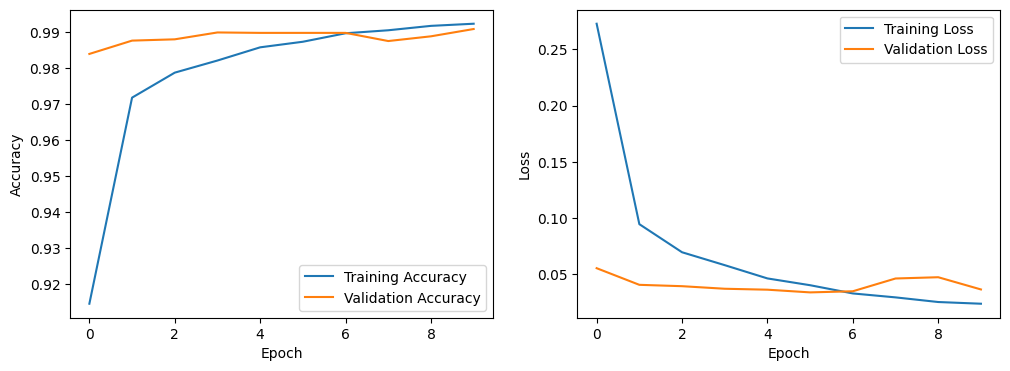

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Install Tensor.js so that we can convert the h5 file to something that can be used in javascript


In [26]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras /content/digit_classifier.h5 /content//digit_classifier_tfjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-13 00:56:06.354468: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-13 00:56:06.354614: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-13 00:56:06.354632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
